## Advanced Sorting Algorithms: QuickSort and Merge Sort

In [1]:
## Define some function useful for testing
import random

## generate an array of n random integers up to 10000
def get_random_array(n):
    return [random.randint(0, 10000) for _ in range(n)]

def test_sorting_algorithm(algorithm):
    for _ in range(100):
        A = get_random_array(random.randint(0, 1000))
        A_sorted = algorithm(A)
        assert A_sorted == sorted(A), "FAIL!"
        
# testing testing function
test_sorting_algorithm(sorted)

## QuickSort 

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done **in-place**, requiring small additional amounts of memory to perform the sorting.

Thus, the most important part of QuickSort is its partition algorithm. 
Given a pivot element, the partition algorithm splits a subarray into three parts.

- Elements that are smaller than or equal to the pivot
- The pivot
- Elements that are greater than or equal to the pivot

The algorithm works in-place, i.e., it performs the partition within the subarray itself without any extra space.

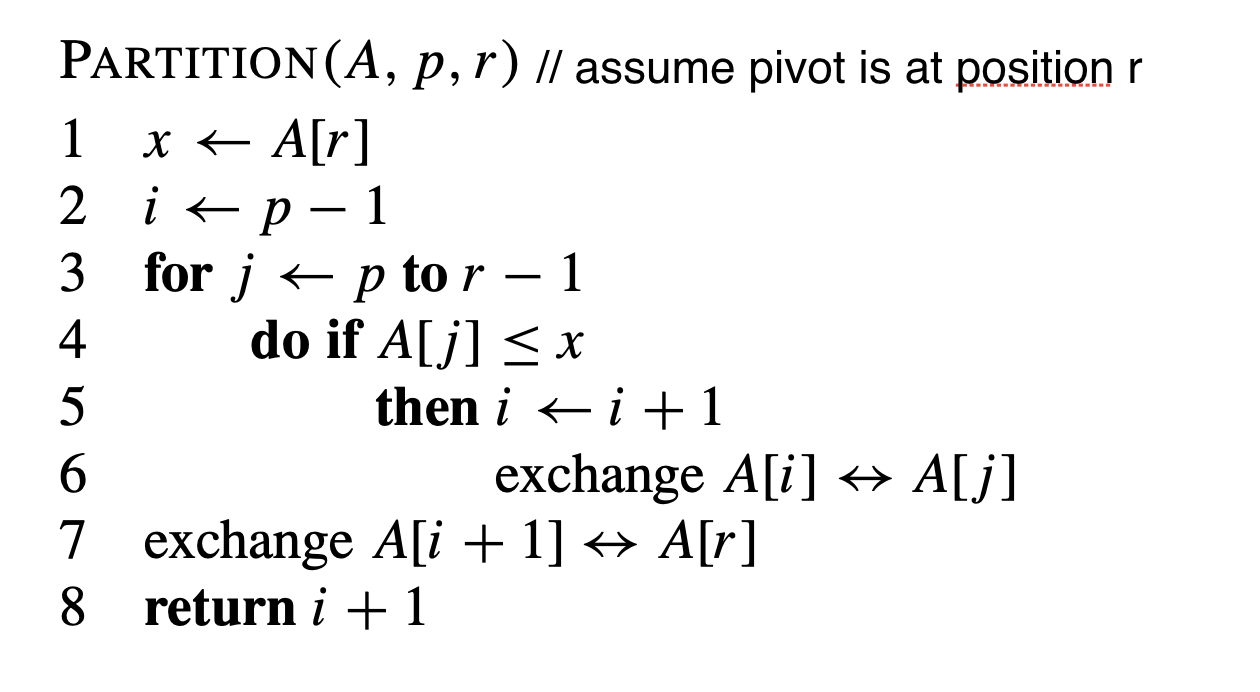

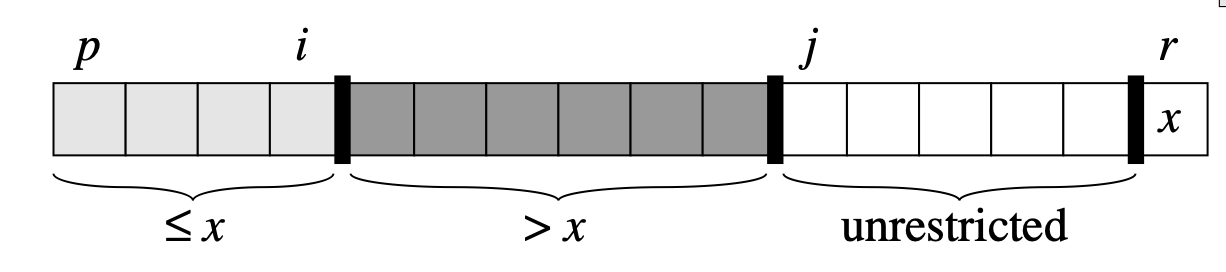

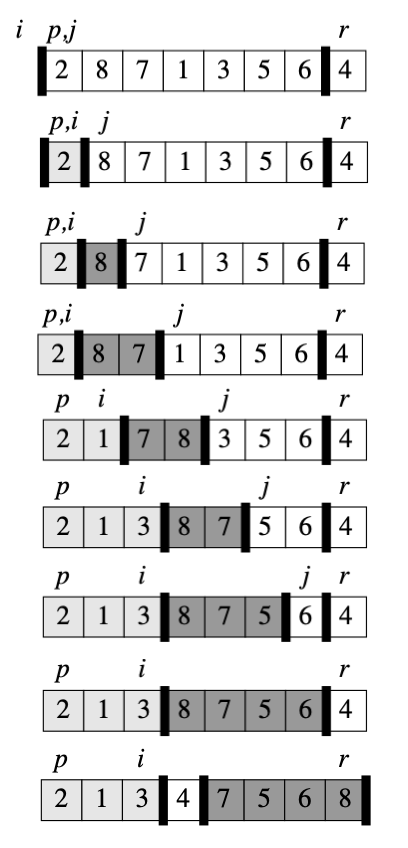

### Exercise: Binary Vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.

In [2]:
import random

binary = [random.randint(0,1) for _ in range(20)]
print(binary)

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]


In [3]:
def binary_partition_sort(arr):
    i = 0 #creating index to keep track of first unsorted element
    for j in range(0, len(arr)): #looping from the first to the last element
        if arr[j] == 0: #zero is the pivot so I compare everything to it 
            arr[i], arr[j] = arr[j], arr[i] #swap zeros (when found) with the ones
            i += 1 #increasing index of first unsorted
    return arr

In [4]:
sorted(binary) == binary_partition_sort(binary)

True

### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [5]:
def partition(A, low, high):
    pidx = random.randint(low, high) #choosing a random index of the current array
    A[high], A[pidx] = A[pidx], A[high] #swapping the random element chosen as pivot with the last element of the array
    pivot = A[high] 
    i = low-1 #getting a index to track where the left hand side of the partition should end, we'll swap the next element in case we find another element pertaining to the group, so we subtract one
  
    for j in range(low, high): #looping across the current array
        if A[j] <= pivot: #comparing each element to get the ones that should have a lower value than the pivot on the left
            i = i+1 #moving the index on the right to swap
            A[i], A[j] = A[j], A[i] #swapping the element which should be on the left with the first element that's on the right so that each will be grouped together
  
    A[i+1], A[high] = A[high], A[i+1] #swapping the pivot (at last element position) with the first element of the right hand side
    return i+1 #it returns the index to consider for the left hand side (<= pivot) of the array

In [6]:
def quickSort_rec(A, low, high): #it implements the divide and conquer approach
    if low < high: #until the array is of length 1 (if low is 0 and len(A) is 1 which results in high = 0, it stops)
        pi = partition(A, low, high) #divide the array into two sub arrays (it returns the index of the left side)
        quickSort_rec(A, low, pi-1) #it recursively repeat on the left hand side the partition algorithm
        quickSort_rec(A, pi+1, high) #the same on the right side

In [7]:
def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A)-1) #running the quicksort algorithm on the copied array
    return A


In [8]:
test_sorting_algorithm(quickSort)

## Let's do some experiments

Is QuickSort faster than InsertionSort and SelectionSort in practice?

In [9]:
def insertionSort(coll):
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = curr
    return A

In [10]:
def selectionSort(coll):
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

In [11]:
A = get_random_array(10000)

In [12]:
%timeit quickSort(A)

44.7 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit insertionSort(A)

4.8 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit selectionSort(A)

4.32 s ± 273 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## More than     ~20x faster with arrays of length    10 000. IS takes 3.4 secs
### More than   ~200x faster with arrays of length   100 000. IS takes 5.6 mins
### More than ~2 000x faster with arrays of length 1 000 000. IS takes 9.4 hours. QS takes 16.2 secs.
### More than ~20 000x faster with arrays of length 10 000 000. IS takes 39,3 days. QS takes 5.6 mins.
### More than ~200 000x faster with arrays of length 100 000 000. IS takes 10,8 years. QS take 56 mins.

Try to run the experiments with an array of 1.000.000. **Run insertion sort and selection sort just before you go to sleep.** 

### Let's see how time changes by increasing the length of the array

In [15]:
qs_t = []
is_t = []
ss_t = []

lens = [2**i for i in range(1, 11)]

for n in lens:
    A = get_random_array(n)
    result = %timeit -o quickSort(A)
    qs_t.append( result.best )
    result = %timeit -o insertionSort(A)
    is_t.append( result.best )
    result = %timeit -o selectionSort(A)
    ss_t.append( result.best )

3.17 µs ± 54.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
920 ns ± 6.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.7 µs ± 341 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
6.97 µs ± 86.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.45 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.88 µs ± 48 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.4 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.36 µs ± 33.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.59 µs ± 69.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
33.2 µs ± 683 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.5 µs ± 75.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.5 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
71.1 µs ± 614 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
45.5 µs ± 416 ns per loop (mean ± 

In [16]:
import matplotlib.pyplot as plt # standard way to import

#any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')

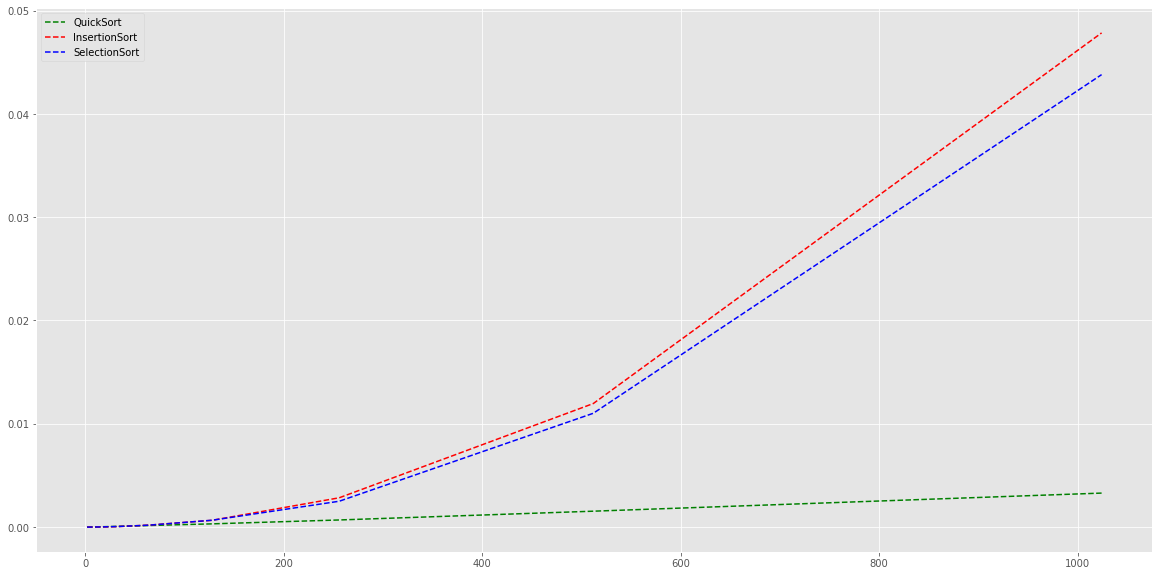

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lens, qs_t, "g--", label="QuickSort")
ax.plot(lens, is_t, "r--", label="InsertionSort")
ax.plot(lens, ss_t, "b--", label="SelectionSort")

_ = ax.legend(loc="best")

## Merge Sort
Merge Sort is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a **stable sort**, which means that the order of equal elements is the same in the input and output. 

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.

Below a running example.

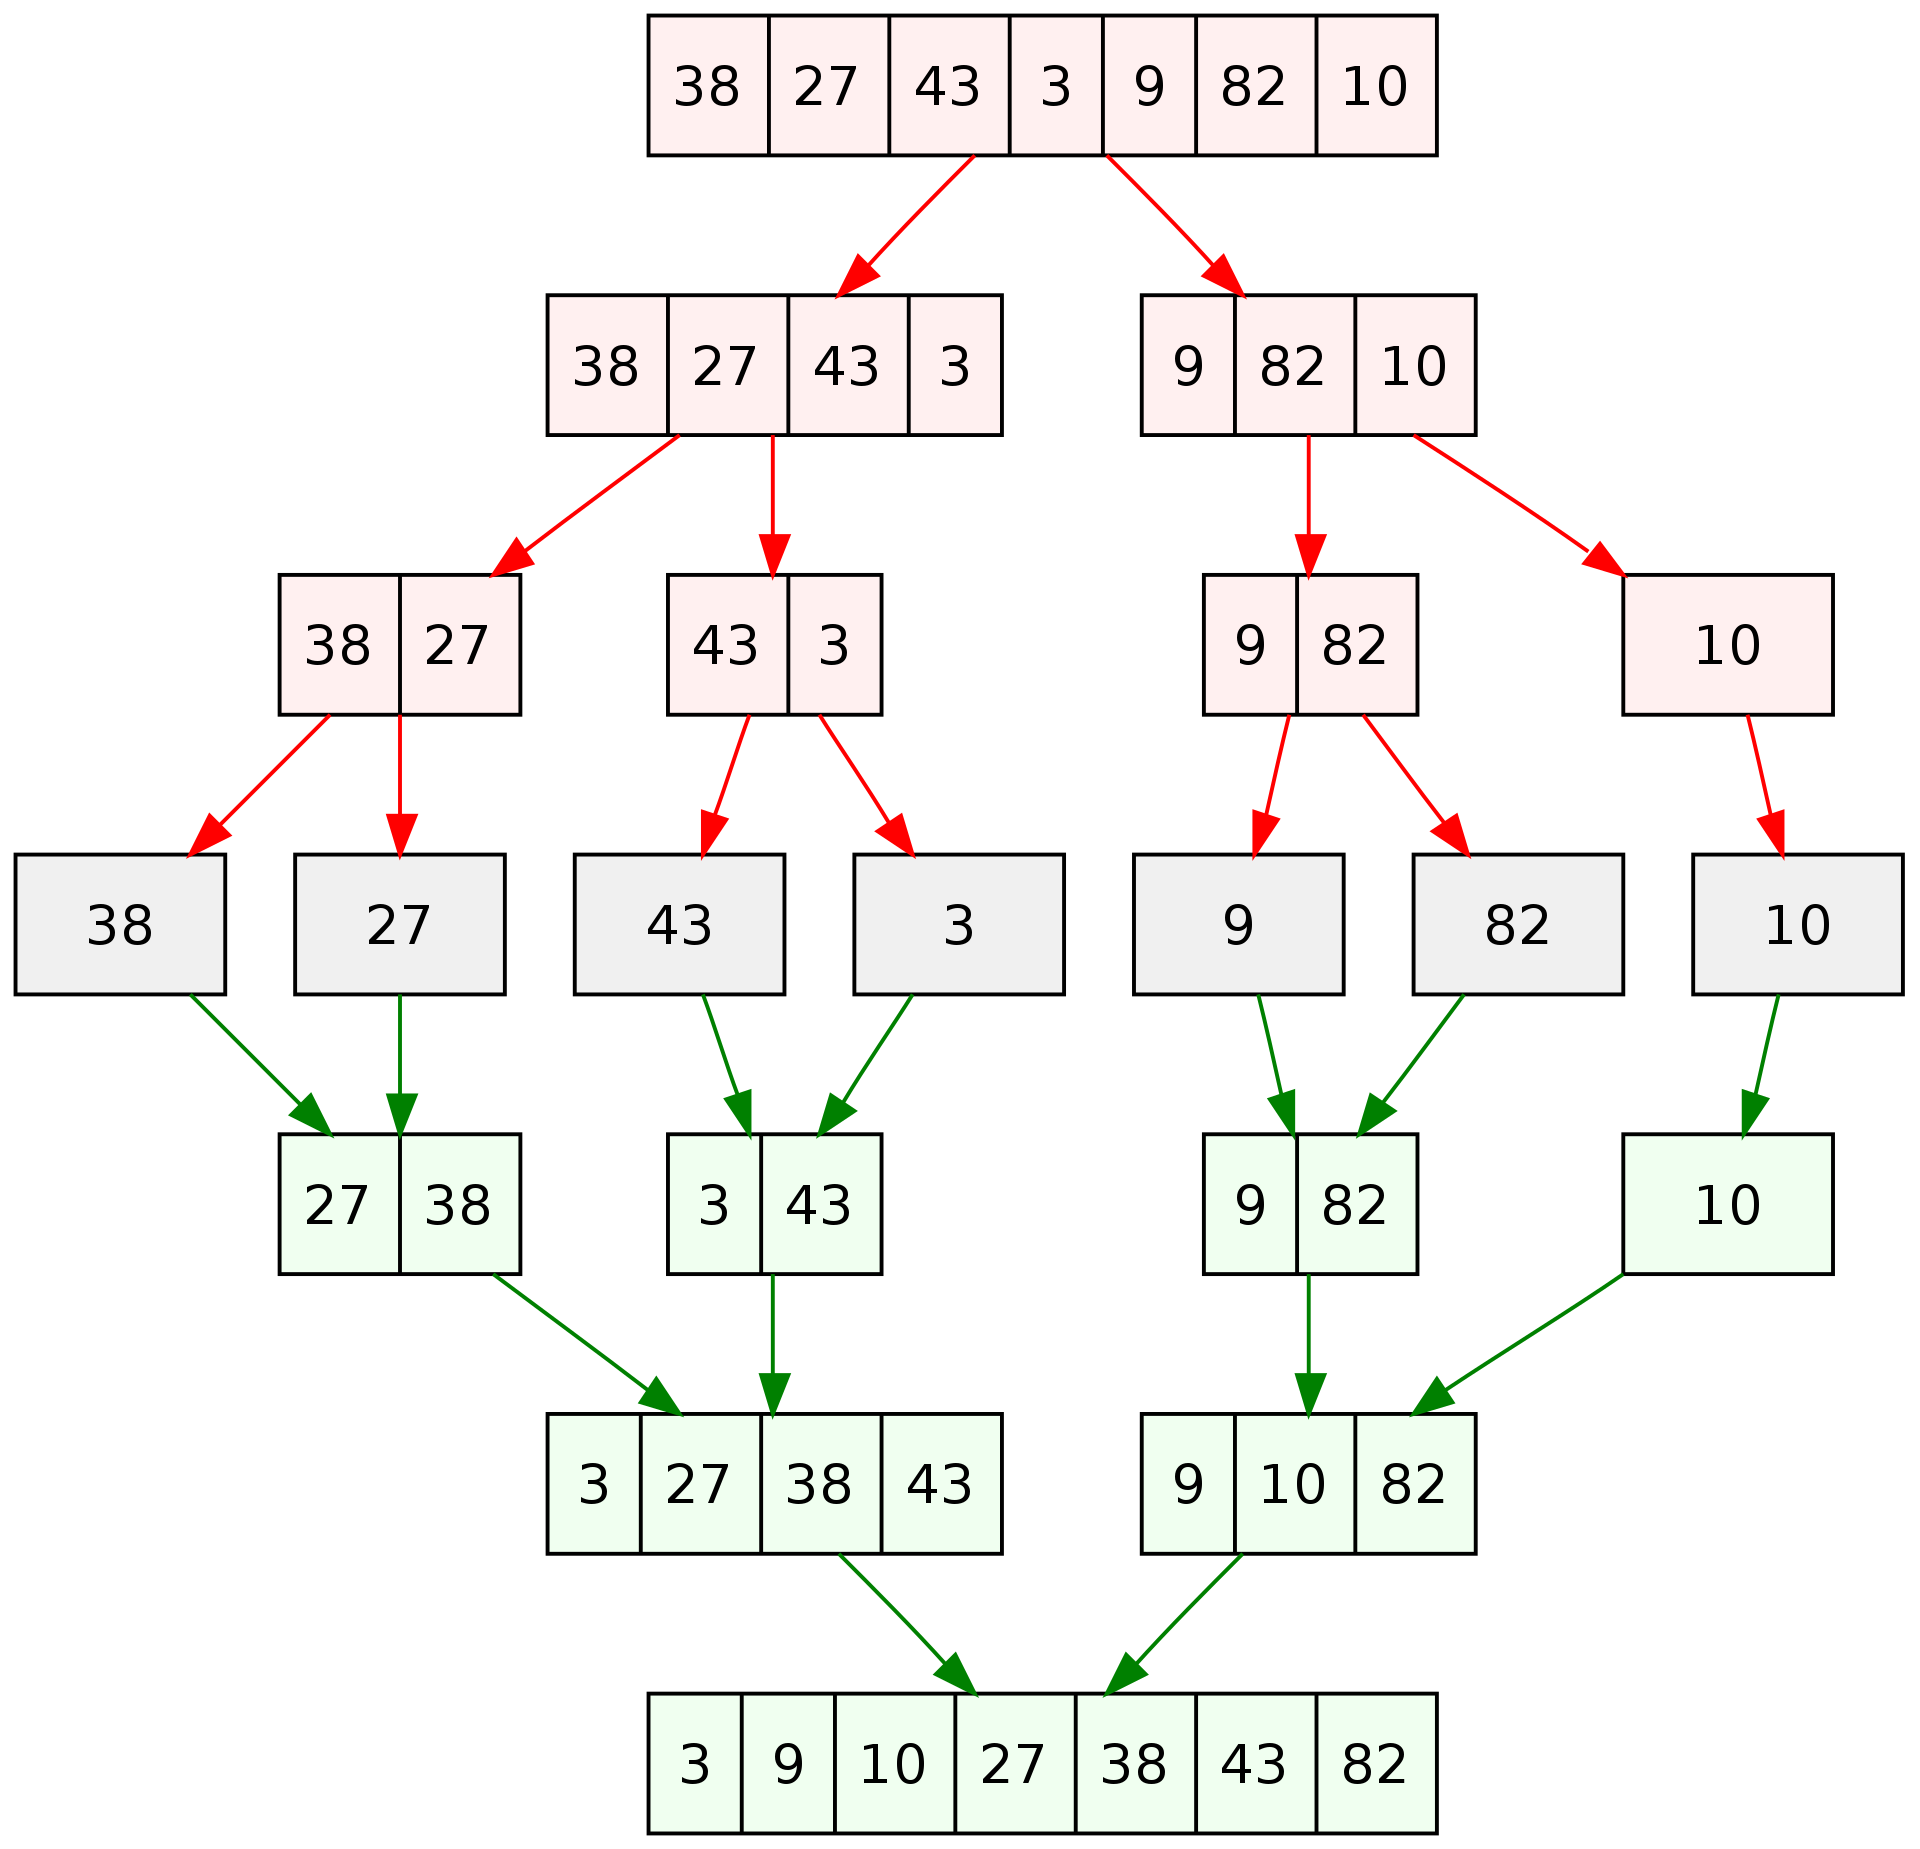

### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [18]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    L = [arr[l+lix] for lix in range(n1)]
    R = [arr[m + 1 + rix] for rix in range(n2)]

    lix, rix, merged_ix = 0, 0, l
    
    while lix < n1 and rix < n2:
        if L[lix] <= R[rix]:
            arr[merged_ix] = L[lix]
            lix += 1
        else:
            arr[merged_ix] = R[rix]
            rix += 1
        merged_ix += 1

    while lix < n1:
        arr[merged_ix] = L[lix]
        lix += 1
        merged_ix += 1

    while rix < n2:
        arr[merged_ix] = R[rix]
        rix += 1
        merged_ix += 1


In [19]:
def mergeSort_rec(A, l, r): 
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r) 
        merge(A, l, m, r)

In [20]:
def mergeSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A)-1)
    return A


In [21]:
test_sorting_algorithm(mergeSort)

In [22]:
A = get_random_array(10000)

In [23]:
%timeit quickSort(A)

60.4 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit mergeSort(A)

70.9 ms ± 549 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
